# Boxplots on Accuracy

In [1]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from DataProcessing import DataProcessing
from Models import Models
from Visualization import Visualization 
import pandas as pd
from sklearn.svm import LinearSVC
import numpy as np

c:\Users\alexa\mambaforge\envs\machinelearning2\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\alexa\mambaforge\envs\machinelearning2\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\alexa\mambaforge\envs\machinelearning2\Lib\site-packages\

In [2]:
processData = DataProcessing()
models = Models()
viz = Visualization()

In [3]:
lsa_category = processData.fullGenerate()
lsa_category.head()

,category,0,1,2,3,4,5,6,7,8,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,trade,0.050147,0.037281,-0.000206,0.242878,-0.019266,0.054649,-0.020230,-0.045969,-0.044232,...,0.004589,0.012180,0.006886,0.021858,0.006857,-0.005808,-0.014058,-0.001934,-0.010196,-0.004465
1,grain,0.021183,0.014576,-0.001260,0.114523,-0.041558,-0.027538,-0.023979,-0.015300,-0.006086,...,-0.008810,-0.000057,-0.005380,-0.002163,-0.006804,0.004270,-0.007070,0.015339,-0.007966,-0.013620
2,ship,0.007862,0.044202,0.003082,0.049880,-0.017624,-0.010744,-0.014257,-0.009725,-0.004609,...,-0.002411,0.001157,-0.003238,0.003287,-0.003531,-0.009195,-0.002388,-0.004788,-0.004020,0.004342
3,gold,0.020363,0.015643,0.002258,0.143045,-0.052395,-0.050786,-0.031452,-0.011667,-0.003362,...,0.005801,-0.004264,0.001425,-0.001591,0.011838,0.001932,0.000462,-0.002208,-0.002273,-0.007710
4,acq,0.022503,0.047837,-0.000685,0.183852,-0.055569,-0.027396,-0.037585,-0.025369,-0.006175,...,-0.006922,-0.005740,-0.006100,-0.009349,-0.006354,0.005881,-0.001204,-0.012043,-0.011142,-0.001299


Since the training data has one additional column, containing the sale price of the house with its given parameters, we split the dataframe into the X_train and y_train dataframes to continue with the calculations.

In [4]:
X, y, X_train, X_test, y_train, y_test = processData.splitDataFrame(lsa_category)
X_Encoded, y_Encoded, X_train_Encoded, X_test_Encoded, y_train_Encoded, y_test_Encoded = processData.splitDataFrameEncoded(lsa_category)
nodeCount = y.nunique()
modelResults = {}
display(X_train.shape, X_train.head(), y_train.shape, y_train.head())

(6588, 2500)

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
4208,0.014124,0.022032,0.000202,0.129069,-0.033199,-0.031122,-0.032259,-0.001634,-0.017049,-0.139746,...,-0.003751,-0.012493,-0.004122,0.004830,-0.018533,0.009522,-0.004084,-0.009241,0.002283,-0.019096
4678,0.018996,0.019213,-0.002918,0.126976,-0.035381,-0.040067,-0.026183,0.006312,-0.010259,0.017905,...,0.014890,-0.004028,-0.002840,0.006091,0.015081,0.001336,0.019071,-0.014700,-0.011338,0.006193
3926,0.015057,0.018183,0.000897,0.076622,-0.033383,-0.043458,-0.018747,0.011470,-0.002067,0.011584,...,0.004838,0.003267,-0.004192,0.007115,0.018579,0.000494,-0.000997,-0.003308,-0.001965,-0.011518
7266,0.023574,0.016856,0.006679,0.146733,-0.054751,-0.078197,-0.019898,0.008121,0.002367,0.031456,...,-0.004390,0.009147,0.000076,-0.006831,0.008302,0.003066,0.010676,0.003814,-0.000383,-0.001816
1476,0.010538,0.029673,0.000898,0.084730,-0.036193,-0.036824,-0.026698,-0.007302,-0.002345,-0.061057,...,0.004218,-0.001508,0.013897,-0.002652,0.000263,0.003560,0.017115,-0.000201,0.010323,-0.000466


(6588,)

4208    trade
4678      acq
3926      acq
7266      acq
1476    crude
Name: category, dtype: object

# Scoring various Regression Models to verify which we will be using going forward

In [5]:
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(X_train)
# y = np.log1p(y_train)
cross_validation = 10
scores_map = {}

##### Random Forest Regressor

In [6]:
forest = RandomForestClassifier(max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)

scores = cross_val_score(forest, X_train, y_train, cv=cross_validation, scoring='accuracy', n_jobs=-1)
print(f"Acc: {scores.mean()} (+/- {scores.std()})")

scores_map['RF'] = scores

Acc: 0.7795972067837887 (+/- 0.013194231860214968)


##### Linear Regression

In [9]:
clf = LinearSVC(C= 1, dual= True, fit_intercept=False, loss='squared_hinge', multi_class= 'crammer_singer', penalty= 'l1')

scores = cross_val_score(clf, X_train, y_train, cv=cross_validation, scoring='accuracy', n_jobs=-1)
print(f"Acc: {scores.mean()} (+/- {scores.std()})")

scores_map['Linear'] = scores

Acc: 0.9555237049780685 (+/- 0.006628509564853599)


##### Multilayer Perceptron Regressor

In [10]:
mlp_classifier = MLPClassifier(max_iter=1000)

scores = cross_val_score(estimator=mlp_classifier,
                         X=X_train, y=y_train,
                         cv=cross_validation,
                         scoring='accuracy', n_jobs=-1)
print(f"Acc: {scores.mean()} (+/- {scores.std()})")

scores_map['MLP'] = scores

Acc: 0.939588166652061 (+/- 0.00616545275955343)


XGBOOST

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_transformed = le.fit_transform(y_train)

In [12]:
xgboost = XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    verbosity=1,
    objective='binary:logistic',
    booster='gbtree')

scores = cross_val_score(xgboost, X_train, y_transformed, cv=cross_validation, scoring='accuracy', n_jobs=-1)
print(f"Acc: {scores.mean()} (+/- {scores.std()})")

scores_map['XGB'] = scores

Acc: 0.9184879918454323 (+/- 0.004353433370143552)


In [15]:
#scores_map['XGB'] = np.repeat(scores, 5)

In [16]:
scores_map = pd.DataFrame(scores_map)
scores_map

,RF,Linear,MLP,XGB
0,0.784522,0.955994,0.937785,0.913505
1,0.783005,0.951442,0.934750,0.915023
2,0.764795,0.966616,0.933232,0.921093
3,0.784522,0.955994,0.951442,0.913505
4,0.776935,0.951442,0.943854,0.924127
5,0.810319,0.957511,0.930197,0.919575
6,0.773900,0.948407,0.934750,0.921093
7,0.772382,0.966616,0.943854,0.921093
8,0.785714,0.945289,0.943769,0.924012
9,0.759878,0.955927,0.942249,0.911854


Text(0.5, 1.0, 'Accuracy of the 3 Best Models')

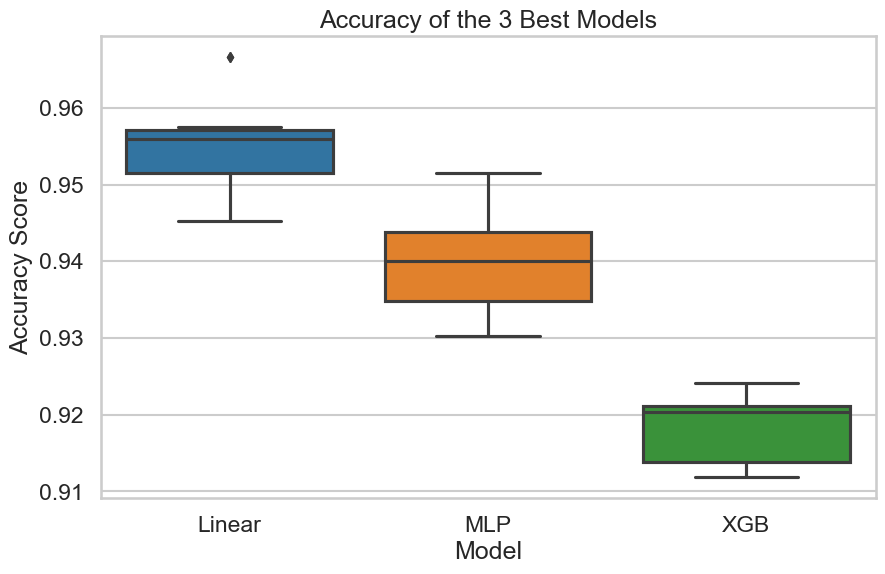

In [21]:
sns.set_context("talk")
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data=scores_map.loc[:, ["Linear", "MLP", "XGB"]])
# plt.ylim(-.05, -.01)
plt.ylabel(r"Accuracy Score")
plt.xlabel(r"Model")
plt.title("Accuracy of the 3 Best Models")